# Análisis de sentimiento

In [ ]:
import pandas as pd
from transformers import pipeline
import torch
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
file_path = "tweets_noboa.csv"
df = pd.read_csv(file_path)

device = 0 if torch.cuda.is_available() else -1  # Usa la GPU si está disponible, de lo contrario usa la CPU

print(f"Device: {device}")

modelo_sentimiento = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=device)

def analizar_sentimiento_avanzado(texto):
    try:
        resultado = modelo_sentimiento(texto[:512])  # Limitar el texto a 512 caracteres si es necesario
        etiqueta = int(resultado[0]['label'].lower().split()[0])
        if etiqueta > 3:
            return "positivo"
        elif etiqueta < 3:
            return "negativo"
        elif etiqueta == 3:
            return "neutral"
        else:
            return etiqueta
    except Exception as e:
        print(f"Error al procesar el texto: {texto} - {e}")
        return "error"

# Aplicar la función a los textos de los tweets
df["sentimiento"] = df["text"].apply(analizar_sentimiento_avanzado)

# Guardar el resultado con la columna de sentimientos
df.to_csv("tweets_sentimiento.csv", index=False)

# Mostrar las primeras filas con el sentimiento calculado
df.head()

Device: 0


,tweet_id,username,user_id,text,created_at,retweet_count,favorite_count,sentimiento
0,1884428552025629003,Oromartv,250236331,🔵 Noticias Oromar | Una encuesta realizada por...,Wed Jan 29 02:29:12 +0000 2025,0,0,negativo
1,1884428461529522588,Es Noticia,1597703412069666818,María Corina Machado agradeció al presidente D...,Wed Jan 29 02:28:50 +0000 2025,0,0,positivo
2,1884428408890782054,Norah Parker,1591913075317374976,@JorgeGestoso De donde saca eso?? Todas las en...,Wed Jan 29 02:28:38 +0000 2025,0,0,negativo
3,1884427591097913541,juan pablo labrador,1148925841,Los mejores presidentes del Planeta The best p...,Wed Jan 29 02:25:23 +0000 2025,0,0,positivo
4,1884427448852299947,Milenium Tvi,1242191856601042945,El Gobiero del Presidente Daniel Noboa oficial...,Wed Jan 29 02:24:49 +0000 2025,0,0,positivo


# Cálculo de popularidad

In [3]:
# Contar los tweets por sentimiento
conteo_sentimientos = df["sentimiento"].value_counts()

positivos = conteo_sentimientos.get("positivo", 0)
negativos = conteo_sentimientos.get("negativo", 0)
neutrales = conteo_sentimientos.get("neutral", 0)

# Cálculo del índice de popularidad
total = positivos + negativos + neutrales
popularidad = (positivos - negativos) / total if total > 0 else 0

print("Análisis de Sentimientos:")
print(f"Positivos: {positivos}, Negativos: {negativos}, Neutrales: {neutrales}")
print(f"Índice de Popularidad: {popularidad:.2f}")

Análisis de Sentimientos:
Positivos: 189, Negativos: 513, Neutrales: 37
Índice de Popularidad: -0.44


# Visualizaciones

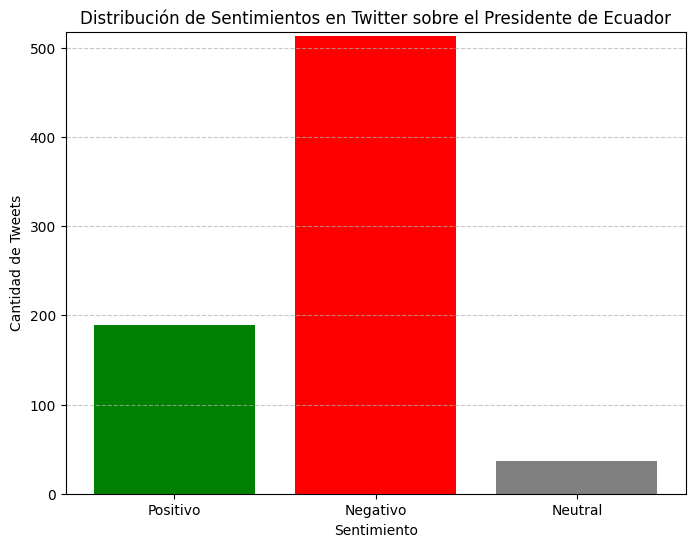

In [6]:
# Crear una gráfica de barras para visualizar los resultados
plt.figure(figsize=(8, 6))
plt.bar(["Positivo", "Negativo", "Neutral"], [positivos, negativos, neutrales], color=["green", "red", "gray"])
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Tweets")
plt.title("Distribución de Sentimientos en Twitter sobre el Presidente de Ecuador")
plt.ylim(0, max(positivos, negativos, neutrales) + 5)  # Ajustar el límite del eje Y
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar la gráfica
plt.show()